# Open RL Benchmark: Comprehensive Tracked Experiments for Reinforcement Learning


[<img src="https://img.shields.io/badge/license-MIT-blue">](https://github.com/vwxyzjn/cleanrl)
[![Code style: black](https://img.shields.io/badge/code%20style-black-000000.svg)](https://github.com/psf/black)
[![Imports: isort](https://img.shields.io/badge/%20imports-isort-%231674b1?style=flat&labelColor=ef8336)](https://pycqa.github.io/isort/)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/openrlbenchmark/openrlbenchmark/blob/master/README.ipynb)


Open RL Benchmark is a comprehensive collection of tracked experiments for RL. It aims to make it easier for RL practitioners to pull and compare all kinds of metrics from reputable RL libraries like Stable-baselines3, Tianshou, CleanRL, and others.

* 💾 [GitHub Repo](https://github.com/openrlbenchmark/openrlbenchmark): source code and more docs.
* 📜 [Design docs](https://docs.google.com/document/d/1cDI_AMr2QVmkC53dCHFMYwGJtLC8V4p6KdL2wnYPaiI/edit?usp=sharing): check out our motivation and vision.
* 🔗 [Open RL Benchmark reports](https://wandb.ai/openrlbenchmark/openrlbenchmark/reportlist): featuring W&B reports with tracked Atari, MuJoCo experiments from SB3, CleanRL, and others.

> ⚠️ This is the `0.1.1a5` alpha release. There has been a major refactoring. If you are looking for Pre-Alpha API, check out [43fc8e2](https://github.com/openrlbenchmark/openrlbenchmark/tree/43fc8e2066ac6371913ac53b629928ac15a65e13). Expect breaking changes in the future.

## Installation

You can install via `pip`:

In [1]:
!pip install openrlbenchmark -q

## Get started

Open RL Benchmark provides an RLops CLI to pull and compare metrics from Weights and Biases. The following example shows how to compare the performance of SB3's ppo, a2c, ddpg, ppo_lstm, sac, td3, ppo, trpo, CleanRL's sac on `HalfCheetahBulletEnv-v0`.

In [2]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: costa-huang. Use `wandb login --relogin` to force relogin


True

In [3]:
%%sh
python -m openrlbenchmark.rlops \
    --filters '?we=openrlbenchmark&wpn=sb3&ceik=env&cen=algo&metric=rollout/ep_rew_mean' \
        'a2c' \
        'ddpg' \
        'ppo_lstm' \
        'sac' \
        'td3' \
        'ppo' \
        'trpo' \
    --filters '?we=openrlbenchmark&wpn=cleanrl&ceik=env_id&cen=exp_name&metric=charts/episodic_return' \
        'sac_continuous_action?tag=rlops-pilot' \
    --env-ids HalfCheetahBulletEnv-v0 \
    --pc.ncols 1 \
    --pc.ncols-legend 2 \
    --output-filename compare

{
│   'wandb_project_name': 'sb3',
│   'wandb_entity': 'openrlbenchmark',
│   'custom_env_id_key': 'env',
│   'custom_exp_name': 'algo',
│   'metric': 'rollout/ep_rew_mean'
}
========= a2c
a2c ({}) in HalfCheetahBulletEnv-v0 has 10 runs
┣━━ HalfCheetahBulletEnv-v0__a2c__2268858888__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__2520749037__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__827811957__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__3717708620__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__3199124344__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__1781008463__1671039833 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__2960691599__1671039817 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__3573633130__1671039817 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__2025636415__1671029334 with tags = []
┣━━ HalfCheetahBulletEnv-v0__a2c__3672549345__1671024197 with tags = []
========= ddpg
ddpg ({}) in HalfCheetahBulle

wandb: Thanks for trying out the Report API!
wandb: For a tutorial, check out https://colab.research.google.com/drive/1CzyJx1nuOS4pdkXa2XPaRQyZdmFmLmXV
wandb: 
wandb: Try out tab completion to see what's available.
wandb:   ∟ everything:    `wr.<tab>`
wandb:       ∟ panels:    `wr.panels.<tab>`
wandb:       ∟ blocks:    `wr.blocks.<tab>`
wandb:       ∟ helpers:   `wr.helpers.<tab>`
wandb:       ∟ templates: `wr.templates.<tab>`
wandb:       
wandb: For bugs/feature requests, please create an issue on github: https://github.com/wandb/wandb/issues
/usr/local/lib/python3.8/dist-packages/expt/plot.py:415: UserWarning: The x value (column `global_step`) is not consistent over different runs. Automatically falling back to the subsampling and interpolation mode (n_samples=10000). Explicitly setting the `n_samples` parameter is strongly recommended.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/expt/plot.py:415: UserWarning: The x value (column `_runtime`) is not consistent over diff

Here, we use create multiple filters. The first string in the first filter is `'?we=openrlbenchmark&wpn=sb3&ceik=env&cen=algo&metric=rollout/ep_rew_mean'`, which is a query string that specifies the following:

* `we`: the W&B entity name
* `wpn`: the W&B project name
* `ceik`: the custom key for the environment id
* `cen`: the custom key for the experiment name
* `metric`: the metric we are interested in

So we are fetching metrics from [https://wandb.ai/openrlbenchmark/sb3](https://wandb.ai/openrlbenchmark/sb3). The environment id is stored in the `env` key, and the experiment name is stored in the `algo` key. The metric we are interested in is `rollout/ep_rew_mean`.

Similarly, we are fetching metrics from [https://wandb.ai/openrlbenchmark/cleanrl](https://wandb.ai/openrlbenchmark/cleanrl). The environment id is stored in the `env_id` key, and the experiment name is stored in the `exp_name` key. The metric we are interested in is `charts/episodic_return`.

The command above generates the following plot:

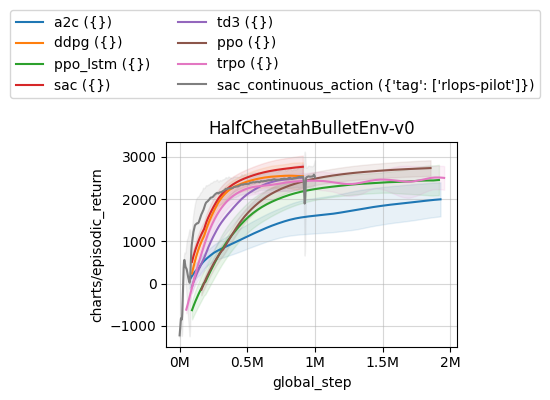

In [4]:
from IPython.display import Image
Image('compare.png')

In [5]:
from IPython.display import Markdown
Markdown("compare.md")

|                         | a2c ({})         | ddpg ({})        | ppo_lstm ({})    | sac ({})         | td3 ({})         | ppo ({})         | trpo ({})        | sac_continuous_action ({'tag': ['rlops-pilot']})   |
|:------------------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:---------------------------------------------------|
| HalfCheetahBulletEnv-v0 | 1965.12 ± 390.11 | 2545.87 ± 269.50 | 2403.32 ± 295.37 | 2722.18 ± 237.47 | 2463.95 ± 247.64 | 2688.06 ± 172.84 | 2505.76 ± 257.70 | 2413.00 ± 141.76                                   |

## More documentation and examples

For more documentation and examples, feel free to check out our 💾 [GitHub Repo](https://github.com/openrlbenchmark/openrlbenchmark)